In [12]:
# Importamos pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer el csv de recetas como DataFrame. Se puede descargar en https://analisi.transparenciacatalunya.cat/Salut/Receptes-facturades-al-Servei-Catal-de-la-Salut/thrd-jj3r/about_data
recetas_all = pd.read_csv("recetas.csv",low_memory=False)

# Seleccionamos solo unas columnas específicas
recetas_lite = recetas_all[['any','sexe','nombre de receptes','nombre d\'envasos','import íntegre','import aportació CatSalut']]

In [13]:
# Filtramos el 2024 porque está incompleto e imprimimos las primeras filas
recetas = recetas_lite[recetas_lite['any']!=2024]

print(recetas.head())

          any  sexe  nombre de receptes  nombre d'envasos  import íntegre  \
1014565  2023  Dona                  10                10           28.30   
1014566  2023  Dona                   3                 3           49.42   
1014567  2023  Dona                  63                63          215.43   
1014568  2023  Dona                 237               237         1832.35   
1014569  2023  Dona                  30                30           84.27   

         import aportació CatSalut  
1014565                      18.68  
1014566                      42.73  
1014567                     137.30  
1014568                    1088.72  
1014569                      63.36  


any
2016    136275849
2017    136729914
2018    137365882
2019    139811310
2020    141555233
2021    143025558
2022    151505177
2023    156796667
Name: nombre de receptes, dtype: int64


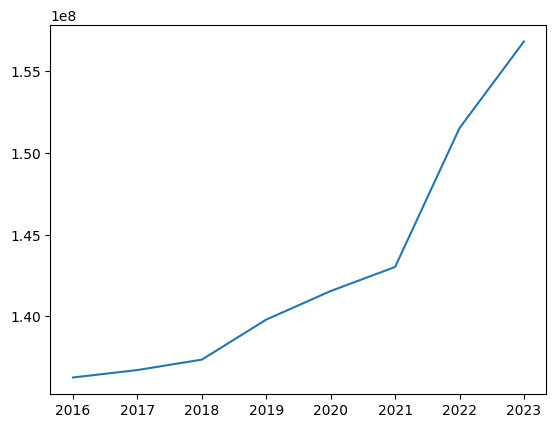

In [15]:
# Recetas por año
recetas_anyo = recetas.groupby('any')['nombre de receptes'].sum()
print(recetas_anyo)
plt.plot(recetas_anyo)
plt.show()

In [27]:
# Recetas, envases y envases por receta por sexo y año
recetas_as = recetas.groupby(['any','sexe'])[['nombre de receptes','nombre d\'envasos']].agg(["sum",max])
recetas_as['envasos per recepta'] = recetas_as['nombre d\'envasos']['sum']/recetas_as['nombre de receptes']['sum']
print(recetas_as)

                       nombre de receptes         nombre d'envasos          \
                                      sum     max              sum     max   
any  sexe                                                                    
2016 Altres                          1718     166             1718     166   
     Dona                        77128768   80490         77140103   80490   
     Home                        58733752   41468         58744549   41468   
     Sense especificar             411611    4086           412165    4086   
2017 Altres                          1665     139             1665     139   
     Dona                        77246101   84772         77256035   84772   
     Home                        59071138   43426         59080411   43426   
     Sense especificar             411010    4409           411490    4409   
2018 Altres                          1481     134             1481     134   
     Dona                        77458711   93766         774646

/var/folders/ml/7kx5fr6920j1qvdwgln9z2_r0000gn/T/ipykernel_50153/2762778894.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  recetas_as = recetas.groupby(['any','sexe'])[['nombre de receptes','nombre d\'envasos']].agg(["sum",max])
